# Predicting Columns in a Table - In Depth

This tutorial describes how you can exert greater control over `fit()` by specifying the appropriate arguments. Let's start by loading the same census data table, and try to predict the `occupation` variable in order to demonstrate a multiclass classification problem.

In [1]:
import autogluon as ag
from autogluon import TabularPrediction as task

train_data = task.Dataset(file_path='https://autogluon.s3-us-west-2.amazonaws.com/datasets/AdultIncomeBinaryClassification/train_data.csv') # can be local CSV file as well, returns Pandas object.
train_data = train_data.head(500) # subsample 500 data points for faster demo
print(train_data.head())

val_data = task.Dataset(file_path='https://autogluon.s3-us-west-2.amazonaws.com/datasets/AdultIncomeBinaryClassification/test_data.csv')

label_column = 'occupation'
print(train_data['occupation'].describe())

/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/botocore/vendored/requests/packages/urllib3/_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``

Loaded https://autogluon.s3-us-west-2.amazonaws.com/datasets/AdultIncomeBinaryClassification/train_data.csv | Columns = 15 / 15 | Rows = 39073  ->  39073
   age   workclass  fnlwgt   education  education-num       marital-status  \
0   25     Private  178478   Bachelors             13        Never-married   
1   23   State-gov   61743     5th-6th              3        Never-married   
2   46     Private  376789     HS-grad              9        Never-married   
3   55           ?  200235     HS-grad              9   Married-civ-spouse   
4   36     Private  224541     7th-8th              4   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Tech-support       Own-child   White   Female             0   
1    Transport-moving   Not-in-family   White     Male             0   
2       Other-service   Not-in-family   White     Male             0   
3                   ?         Husband   White     Male             0   
4   Handlers-clea

Let's use AutoGluon to train some models, this time exerting greater control over the process via user-specified arguments. To demonstrate how you can provide your own validation dataset against which AutoGluon tunes hyperparameters, we'll use the previous test dataset as validation data this time. If you do not have any particular validation dataset of interest, we recommend omitting the `tuning_data` argument and letting AutoGluon automatically select validation data from your provided training set (as it uses smart strategies such as stratified sampling in classification problems).  For greater control, you can specify the `holdout_frac` argument to tell AutoGluon what fraction of the provided training data to hold out for validation. 

**Caution:** Since AutoGluon tunes internal knobs based on this validation data, performance estimates reported on this data may be over-optimistic. For unbiased performance estimates, you should always call `predict()` on an entirely separate dataset (that was never given to `fit()`), as we did in the previous **Quick-Start** tutorial. 

`fit()` trains neural networks and gradient boosted tree models by default, and we can specify various hyperparameter values for each type of model. For each hyperparameter, we can either specify a single fixed value, or a search space of values to consider during the hyperparameter optimization. Hyperparameters which we do not specify are left at default settings chosen by AutoGluon, which may be fixed values or search spaces, depending on the particular hyperparameter and the setting of `hyperparameter_tune`.

First 10 unique y values: [' Tech-support' ' Transport-moving' ' Other-service' ' ?'
 ' Handlers-cleaners' ' Sales' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Prof-specialty']

AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == object)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

classes kept: 13 / 14
percent of data kept: 0.998
Performing general data processing with merged train & test data. Validation performance may not accurately reflect performance on new test data.
Feature Generator processed  10223 data points with 14 features
Original Features:
	int features: 6
	object features: 8
Generated Features:
	int features: 0
All Features:
	int features: 6
	object features: 8
Total time taken in :  fit_transform 0.07703208923339844
Saving agModels-predictOccupation/learner.pkl
Beginning hyperparameter tuning for Gradient Boost


Saving agModels-predictOccupation/models/GradientBoostClassifier/trial_1_model.pkl
Saving agModels-predictOccupation/models/GradientBoostClassifier/trial_0_model.pkl
Saving agModels-predictOccupation/models/GradientBoostClassifier/trial_2_model.pkl
Time for Gradient Boosting hyperparameter optimization: 15.478951930999756
Best hyperparameter configuration for Gradient Boosting Model: 
{'feature_fraction': 0.9257837077007836, 'learning_rate': 0.18038269042001423, 'min_data_in_leaf': 17, 'num_leaves': 40}
Saving agModels-predictOccupation/models/trainer.pkl
Beginning hyperparameter tuning for Tabular Neural Network...
Hyperparameter search space for Tabular Neural Network: 
network_type:   Categorical['widedeep', 'feedforward']
layers:   Categorical[[100], [1000], [200, 100], [300, 200, 100], [400, 300, 200, 100], [400, 400, 400]]
activation:   Categorical['relu', 'softrelu', 'tanh']
embedding_size_factor:   Real: lower=0.5, upper=1.5
use_batchnorm:   Categorical[True, False]
dropout_pr

/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (499). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Saving agModels-predictOccupation/models/NeuralNetClassifier/train_tabNNdataset.pkl
Saving agModels-predictOccupation/models/NeuralNetClassifier/validation_tabNNdataset.pkl



Loading agModels-predictOccupation/models/NeuralNetClassifier/train_tabNNdataset.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/validation_tabNNdataset.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/train_tabNNdataset.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/validation_tabNNdataset.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/train_tabNNdataset.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/validation_tabNNdataset.pkl
Saving agModels-predictOccupation/models/NeuralNetClassifier/trial_3_tabularNN.pkl
Saving agModels-predictOccupation/models/NeuralNetClassifier/trial_4_tabularNN.pkl
Saving agModels-predictOccupation/models/NeuralNetClassifier/trial_5_tabularNN.pkl


Please either provide filename or allow plot in get_training_curves


Time for TabularNN hyperparameter optimization: 25.158283948898315
Best hyperparameter configuration for Tabular Neural Network: 
{'activation.choice': 2, 'dropout_prob': 0.28690403482948235, 'embedding_size_factor': 1.4725211089104118, 'layers.choice': 0, 'learning_rate': 0.007045818441005358, 'network_type.choice': 0, 'use_batchnorm.choice': 1, 'weight_decay': 3.997070603602934e-09}
Saving agModels-predictOccupation/models/trainer.pkl
Performance of GradientBoostClassifier_trial_0 model: 0.28661044837515426
Performance of GradientBoostClassifier_trial_1 model: 0.2781777046482929
Performance of GradientBoostClassifier_trial_2 model: 0.28722747840394897
Performance of NeuralNetClassifier_trial_3 model: 0.12484574249280132
Performance of NeuralNetClassifier_trial_4 model: 0.27426984779925956
Performance of NeuralNetClassifier_trial_5 model: 0.14747017688194158
Loading agModels-predictOccupation/models/GradientBoostClassifier/trial_0_model.pkl
Loading agModels-predictOccupation/models/Gr

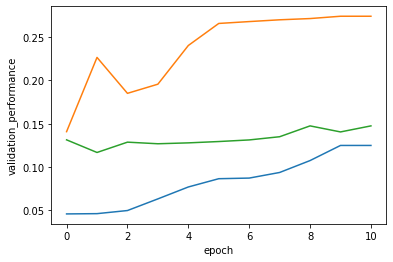

In [2]:
hyperparameter_tune = True # whether or not to do hyperparameter optimization

nn_options = { # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10, # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'), # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100],[1000],[200,100],[300,200,100],[400,300,200,100],[400]*3), 
      # Each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer (length of list determines # of hidden layers)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), # dropout probability (real-valued hyperparameter)
}

gbm_options = { # specifies non-default hyperparameter values for gradient boosted tree models
    'num_boost_round': 100, # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36), # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {'NN': nn_options, 'GBM': gbm_options} # hyperparameters of each model type
# If one of these keys is missing from hyperparameters dict, then no models of that type are trained.

feature_prune = False # whether or not to perform feature selection (fit may take a while if True)
time_limits = 2*60 # train various models for under ~2 min
num_trials = 3 # try at most 3 different hyperparameter configurations for each type of model
nthreads_per_trial = 1 # use this many CPU threads per training trial (ie. evaluation of one hyperparameter configuration)
search_strategy = 'skopt' # to tune hyperparameters using SKopt Bayesian optimization routine
output_directory = 'agModels-predictOccupation' # folder where to store trained models

predictor = task.fit(train_data=train_data, tuning_data=val_data, label=label_column, output_directory=output_directory, 
                     time_limits=time_limits, num_trials=num_trials, nthreads_per_trial=nthreads_per_trial,
                     hyperparameter_tune=hyperparameter_tune, feature_prune=feature_prune,
                     hyperparameters=hyperparameters, search_strategy=search_strategy)

For posteriority, we again demonstrate how to use the trained models to predict on the validation data. We caution again that performance estimates from this data may be biased since it was used to tune hyperparameters.

In [3]:
test_data = val_data.copy()
y_test = test_data[label_column]
test_data = test_data.drop(labels=[label_column],axis=1) # delete label column to prove we are not cheating

predictor = task.load(output_directory) # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data)
print("Predictions:  ", list(y_pred)[:5])
print("Actual labels:  ", list(y_test)[:5])
perf = predictor.evaluate(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Loading agModels-predictOccupation/learner.pkl
Loading agModels-predictOccupation/models/trainer.pkl
Total time taken in :  transform 0.024589061737060547
Loading agModels-predictOccupation/models/GradientBoostClassifier/trial_0_model.pkl
Loading agModels-predictOccupation/models/GradientBoostClassifier/trial_1_model.pkl
Loading agModels-predictOccupation/models/GradientBoostClassifier/trial_2_model.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/trial_3_tabularNN.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/trial_4_tabularNN.pkl
Predictions:   [' Other-service', ' ?', ' Exec-managerial', ' Sales', ' Other-service']
Actual labels:   [' Sales', ' Sales', ' Exec-managerial', ' Exec-managerial', ' Prof-specialty']
Evaluation: accuracy on test data: 0.300235
Evaluations on test data:
{
    "accuracy": 0.30023543863240865,
    "accuracy_score": 0.30023543863240865,
    "balanced_accuracy_score": 0.18372250541688587,
    "matthews_corrcoef": 0.212281707

/Users/jonasmue/virtual/ag/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


`predictor` can also make a prediction on just an individual example rather than a full dataset:

In [4]:
datapoint = test_data.iloc[[0]] # Note: .iloc[0] will not work because it returns pandas Series instead of DataFrame
print(datapoint)
y_pred = predictor.predict(datapoint)

   age workclass  fnlwgt education  education-num       marital-status  \
0   31   Private  169085      11th              7   Married-civ-spouse   

  relationship    race      sex  capital-gain  capital-loss  hours-per-week  \
0         Wife   White   Female             0             0              20   

   native-country   class  
0   United-States   <=50K  
Loading agModels-predictOccupation/models/trainer.pkl
Total time taken in :  transform 0.031119108200073242
Loading agModels-predictOccupation/models/GradientBoostClassifier/trial_0_model.pkl
Loading agModels-predictOccupation/models/GradientBoostClassifier/trial_1_model.pkl
Loading agModels-predictOccupation/models/GradientBoostClassifier/trial_2_model.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/trial_3_tabularNN.pkl
Loading agModels-predictOccupation/models/NeuralNetClassifier/trial_4_tabularNN.pkl


In the above example, the predictive performance may be poor because we specified very little training to ensure quick runtimes.  You can call `fit()` multiple times playing with the above settings to better understand how these choices affect things.

Finally, don't forget to shutdown AutoGluon's remote workers:

In [5]:
ag.done()

**TODO**: Show plots summarizing fit(). Include detailed description of the HPO process dump in trainer.hpo_results